/Users/stuartgeman/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


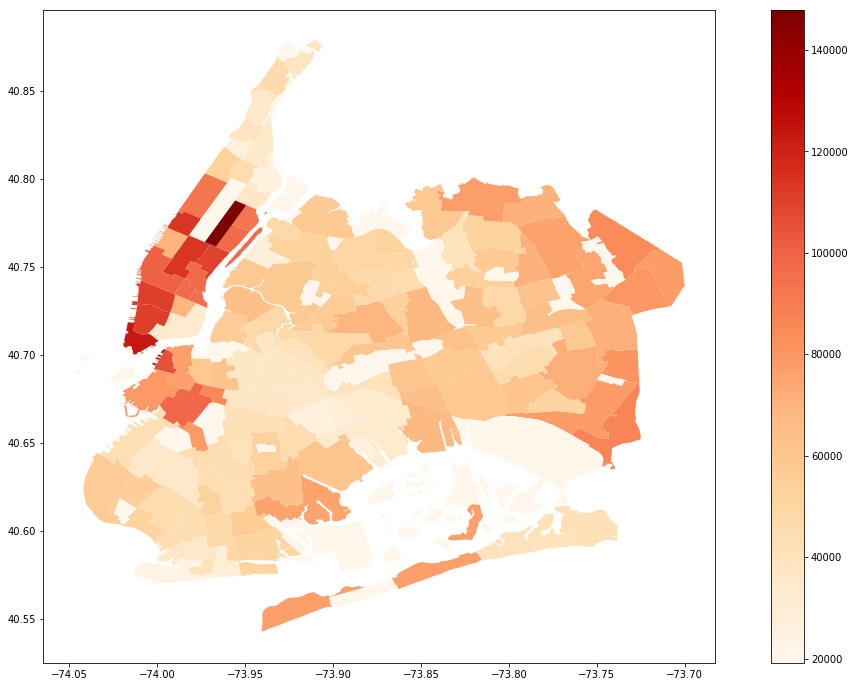

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#This cell creates a choropleth map using median income as a measure for the neighborhoods in Queens, Brooklyn 
#Manhattan

# Neighborhood Tabulation Area (Census tract Stuff)
fname = "nycgiszoningfeatures_201711shp/nynta.shp"
coord_system = {'init': 'epsg:4326'}
ntas = gpd.read_file(fname).to_crs(coord_system)
ntas = ntas.loc[ntas['BoroName'].isin(['Queens','Brooklyn', 'Manhattan'])]
ntas=ntas.reset_index(drop=True)
ntas.rename(columns={'NTACode': 'GeoID'}, inplace=True)
ntas.rename(columns={'NTAName': 'Neighborhood'}, inplace = True)
nta = ntas[['BoroName', 'Neighborhood', 'GeoID', 'geometry']]
# base = ntas.plot(figsize=(500,20), color='white', edgecolor='black')

#Will read in NTA financial data from nta folder: nynta_17d
# :eco2013acs5yrntadata.csv from 
# http://catalog.opendata.city/hr/dataset/nyc-neighborhood-acs-economic-data/resource/671ebb5a-672e-4005-9712-45310afd4308
ecos = pd.read_csv('nynta_17d/eco2013acs5yrntadata.csv', encoding = 'latin1')
eco = ecos[['GeoID','GeogName', 'Borough', 'MdHHIncE']]

#Keep wanted boroughs and Reset index
eco = eco.loc[eco['Borough'].isin(['Queens','Brooklyn', 'Manhattan'])]
eco = eco.reset_index(drop=True)


#Change string values to numberic
md = eco['MdHHIncE']
eco['MdHHIncE'] = pd.to_numeric((md.str.replace(',', '')))

result = pd.merge(nta, eco,on='GeoID')
# Dec = pd.read_csv('Income and Bike Id/december_med_bike_id.csv')
# result = pd.merge(result, dec)
result.plot(figsize = (20,12), column='MdHHIncE', cmap='OrRd', legend = True)
plt.show()

/Users/stuartgeman/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


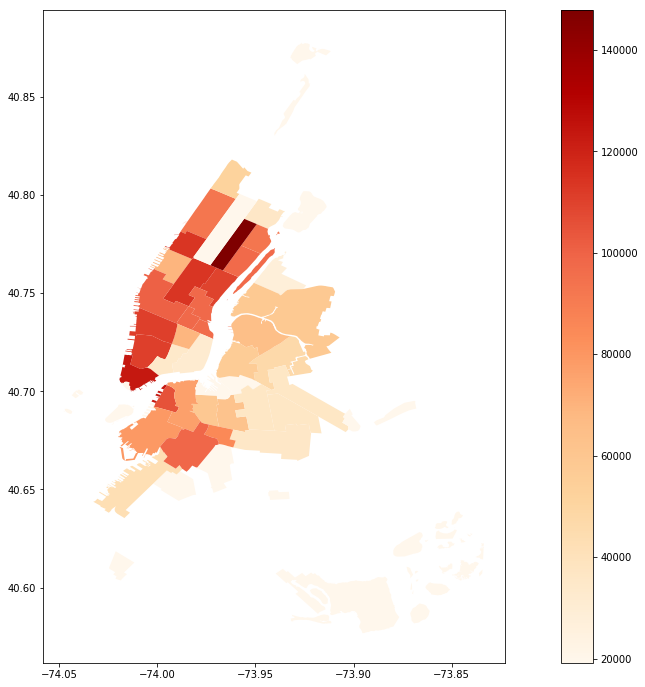

In [4]:
#This cell creates a choropleth map using median income as a measure for the neighborhoods in our dataset
#It uses the result dataframe constructed in the above cell. Note, the other cell is the same except it is
#the boroughs in our dataset.
Dec = pd.read_csv('Income and Bike Id/december_med_bike_id.csv')
hoods =pd.DataFrame({'Neighborhood': list(set(Dec['end neighborhood']))})

#By merging with hoods, we drop all entries from the result dataframe that don't correspond to our dataset
hoods = pd.merge(result,hoods)
hoods.plot(figsize = (20,12), column='MdHHIncE', cmap='OrRd', legend = True)
plt.show()